# SMART LAB - IOT - sem7

# UTILITY ANALYSIS

CONTENT:
1. Raw data
2. Pre-processed data
3. Visualising the utility information:
- daily usage for 5 days
- people vs consumption
- average usage over the 5 days

## 1. Raw data collected

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df = pd.read_csv("./data.csv")
df

,Timestamp,Voltage (V),Current (A),Power (W),Energy (Wh),Frequency (Hz),People Inside
0,01-11-2023 -> 08:54:10,237.4,0.18,18.9,37.8,48.9,0
1,01-11-2023 -> 09:04:10,237.5,0.13,12.6,25.2,49.9,6
2,01-11-2023 -> 09:14:10,237.5,0.15,15.3,30.6,50.1,12
3,01-11-2023 -> 09:24:10,237.9,0.14,13.7,27.4,49.9,30
4,01-11-2023 -> 09:34:10,237.6,0.15,14.3,28.6,48.9,50
...,...,...,...,...,...,...,...
163,08-11-2023 -> 16:10:34,237.2,0.14,13.1,26.2,49.4,60
164,08-11-2023 -> 16:20:34,237.0,0.14,12.7,25.4,49.5,60
165,08-11-2023 -> 16:30:34,236.8,0.14,13.0,26.0,49.1,60
166,08-11-2023 -> 16:40:34,236.3,0.27,56.4,112.8,49.2,30


## 2. Pre-processing the data

In [2]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y -> %H:%M:%S', errors='coerce')

# Split the 'Timestamp' column values into separate date and time columns
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time
df

,Timestamp,Voltage (V),Current (A),Power (W),Energy (Wh),Frequency (Hz),People Inside,Date,Time
0,2023-11-01 08:54:10,237.4,0.18,18.9,37.8,48.9,0,2023-11-01,08:54:10
1,2023-11-01 09:04:10,237.5,0.13,12.6,25.2,49.9,6,2023-11-01,09:04:10
2,2023-11-01 09:14:10,237.5,0.15,15.3,30.6,50.1,12,2023-11-01,09:14:10
3,2023-11-01 09:24:10,237.9,0.14,13.7,27.4,49.9,30,2023-11-01,09:24:10
4,2023-11-01 09:34:10,237.6,0.15,14.3,28.6,48.9,50,2023-11-01,09:34:10
...,...,...,...,...,...,...,...,...,...
163,2023-11-08 16:10:34,237.2,0.14,13.1,26.2,49.4,60,2023-11-08,16:10:34
164,2023-11-08 16:20:34,237.0,0.14,12.7,25.4,49.5,60,2023-11-08,16:20:34
165,2023-11-08 16:30:34,236.8,0.14,13.0,26.0,49.1,60,2023-11-08,16:30:34
166,2023-11-08 16:40:34,236.3,0.27,56.4,112.8,49.2,30,2023-11-08,16:40:34


In [8]:
grouped = df.groupby('Date')
date_dataframes = {str(date): group for date, group in df.groupby('Date')}
date_dataframes['2023-11-01']
# date_dataframes

,Timestamp,Voltage (V),Current (A),Power (W),Energy (Wh),Frequency (Hz),People Inside,Date,Time
0,2023-11-01 08:54:10,237.4,0.18,18.9,37.8,48.9,0,2023-11-01,08:54:10
1,2023-11-01 09:04:10,237.5,0.13,12.6,25.2,49.9,6,2023-11-01,09:04:10
2,2023-11-01 09:14:10,237.5,0.15,15.3,30.6,50.1,12,2023-11-01,09:14:10
3,2023-11-01 09:24:10,237.9,0.14,13.7,27.4,49.9,30,2023-11-01,09:24:10
4,2023-11-01 09:34:10,237.6,0.15,14.3,28.6,48.9,50,2023-11-01,09:34:10
5,2023-11-01 09:44:10,237.2,0.15,15.1,30.2,46.9,55,2023-11-01,09:44:10
6,2023-11-01 09:54:10,237.0,0.16,15.0,30.0,49.6,60,2023-11-01,09:54:10
7,2023-11-01 10:04:10,237.2,0.14,13.1,26.2,49.4,60,2023-11-01,10:04:10
8,2023-11-01 10:14:10,237.0,0.14,12.7,25.4,49.5,60,2023-11-01,10:14:10
9,2023-11-01 10:24:10,236.8,0.14,13.0,26.0,49.1,60,2023-11-01,10:24:10


## 3. Visualising the Utility Information

### A) Daily usage for 5 days

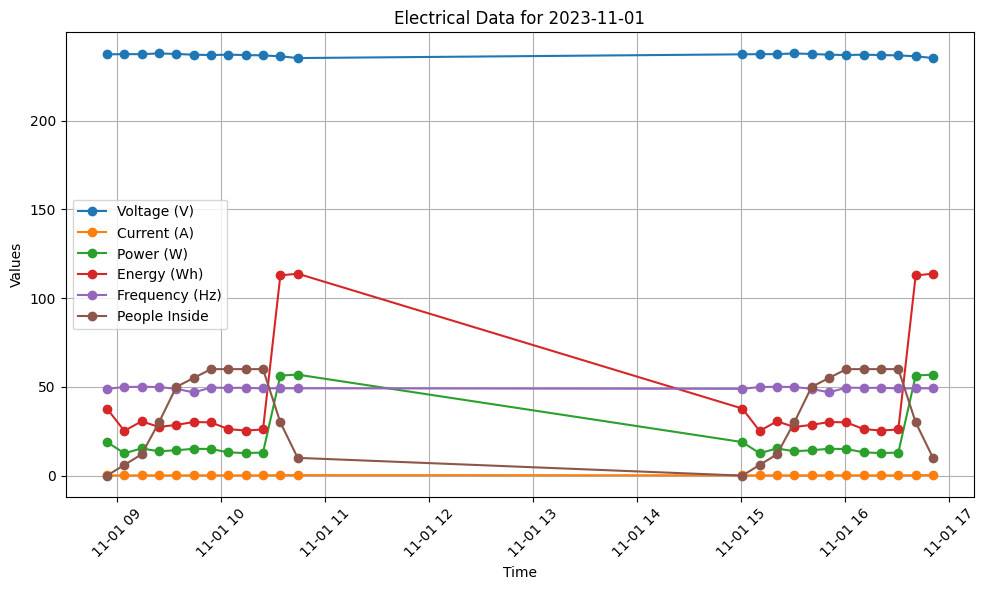

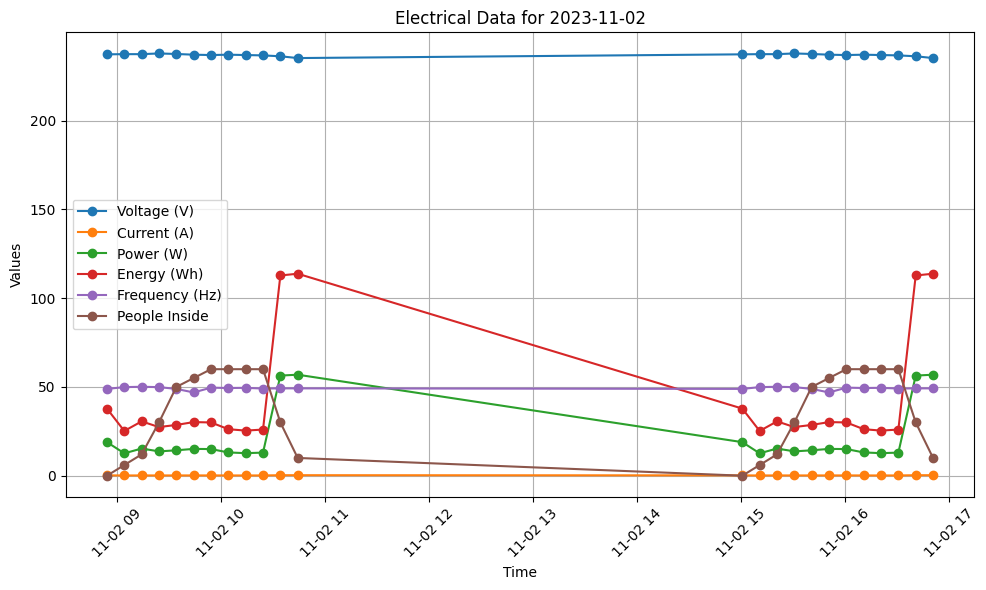

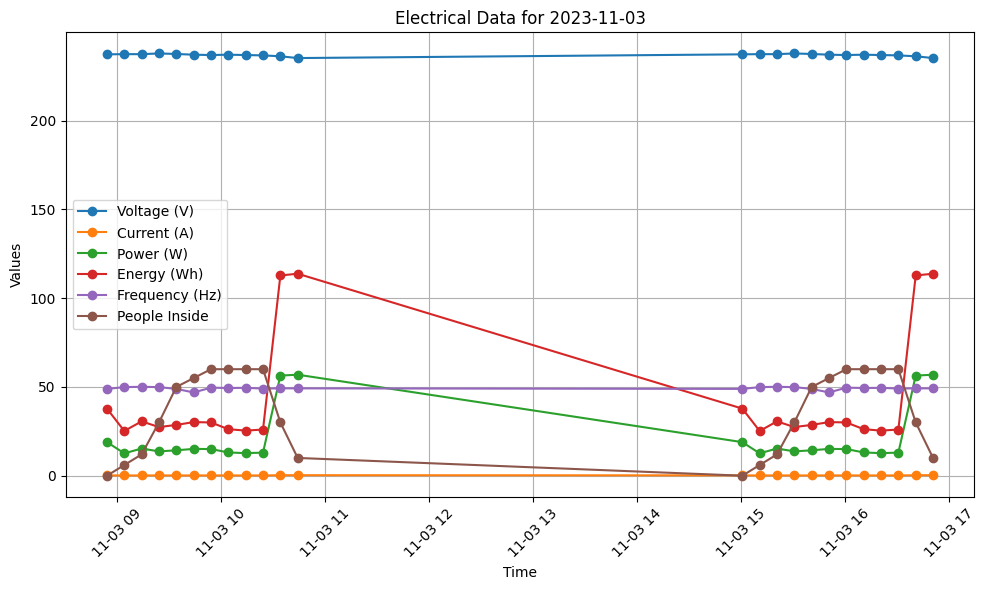

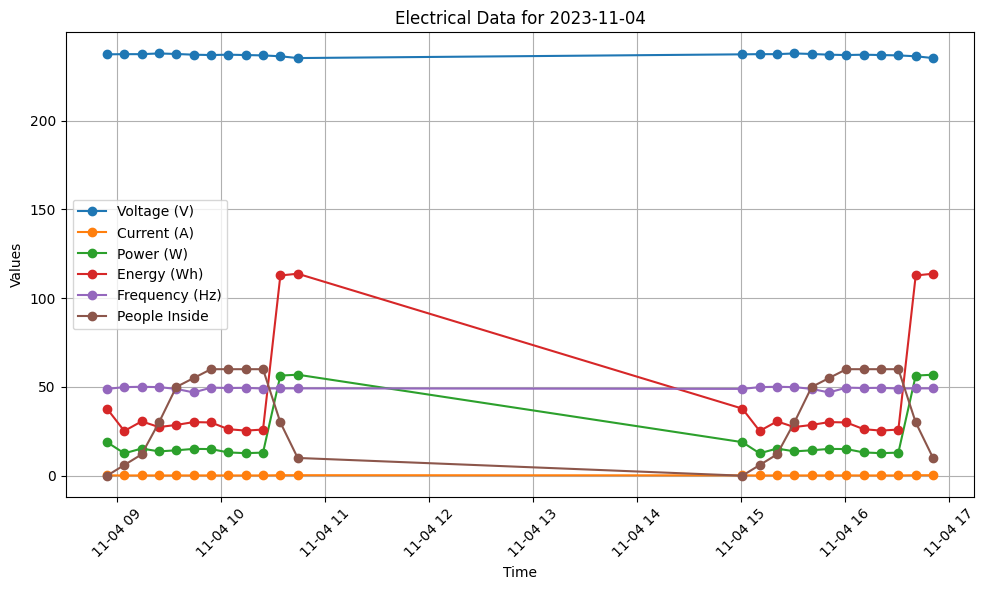

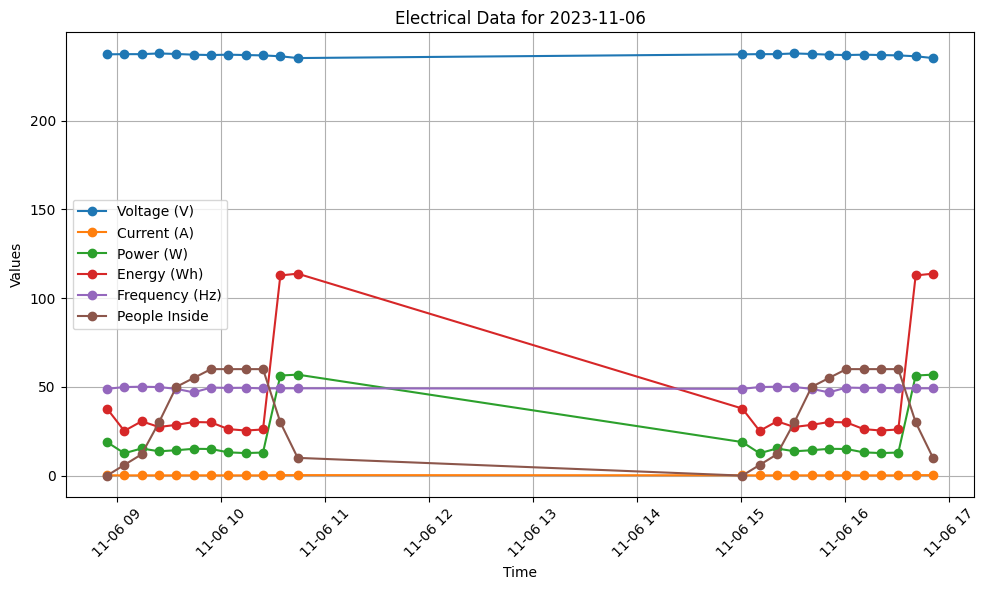

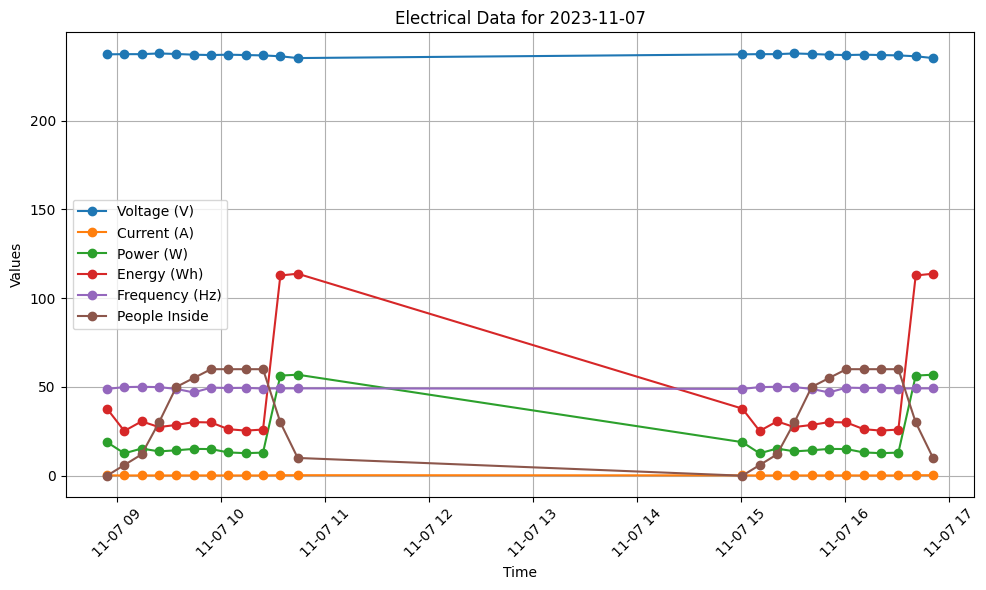

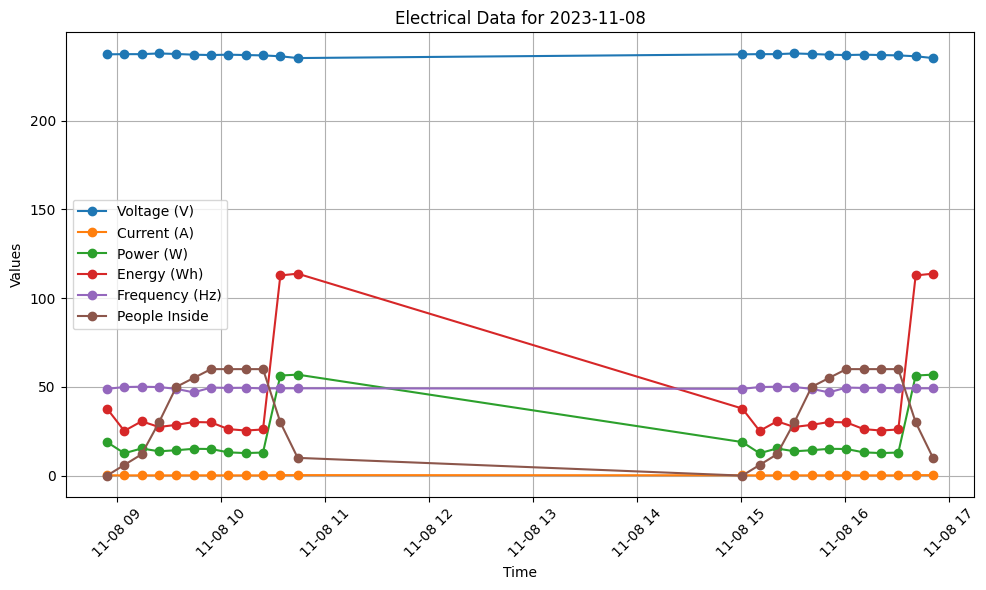

In [9]:
for date, df in date_dataframes.items():
    # Create line plots for all columns
    plt.figure(figsize=(10, 6))
    plt.plot(df['Timestamp'], df['Voltage (V)'], label='Voltage (V)', marker='o')
    plt.plot(df['Timestamp'], df['Current (A)'], label='Current (A)', marker='o')
    plt.plot(df['Timestamp'], df['Power (W)'], label='Power (W)', marker='o')
    plt.plot(df['Timestamp'], df['Energy (Wh)'], label='Energy (Wh)', marker='o')
    plt.plot(df['Timestamp'], df['Frequency (Hz)'], label='Frequency (Hz)', marker='o')
    plt.plot(df['Timestamp'], df['People Inside'], label='People Inside', marker='o')

    plt.title(f'Electrical Data for {date}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


### B) People vs Consumption

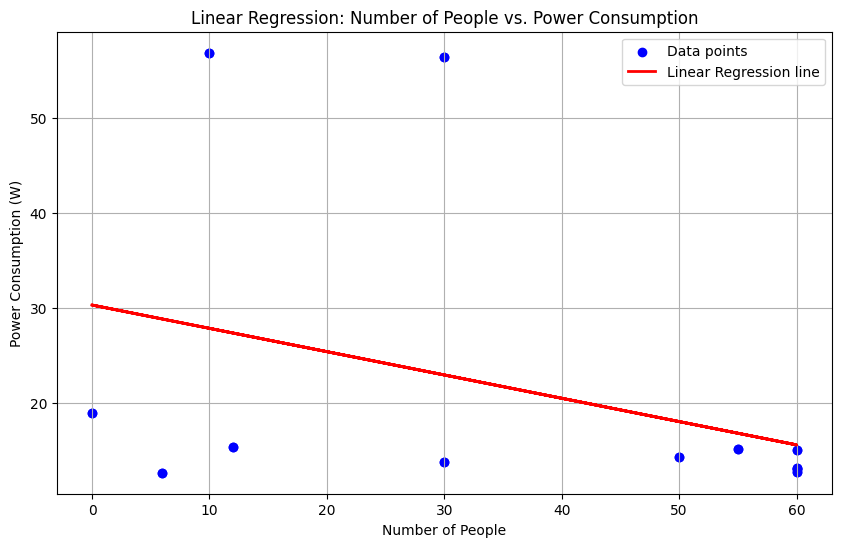

Linear Regression Equation: Power Consumption = -0.25 * Number of People + 30.29


In [10]:
X = df['People Inside'].values.reshape(-1, 1)  # Independent variable: Number of people
y = df['Power (W)'].values  # Dependent variable: Power consumption

# Step 2: Create a linear regression model
model = LinearRegression()

# Step 3: Fit the linear regression model
model.fit(X, y)

# Step 4: Make predictions
y_pred = model.predict(X)

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression line')
plt.xlabel('Number of People')
plt.ylabel('Power Consumption (W)')
plt.title('Linear Regression: Number of People vs. Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Display the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f'Linear Regression Equation: Power Consumption = {slope:.2f} * Number of People + {intercept:.2f}')

### C) Average Usage over the 5 days

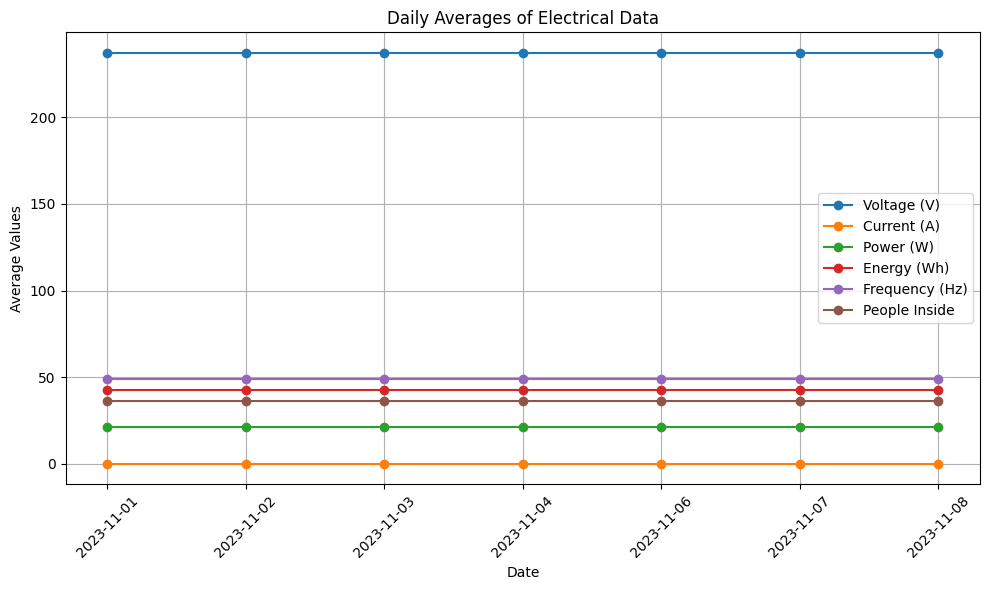

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming date_dataframes is your dictionary containing DataFrames

# Initialize an empty DataFrame to store daily averages
daily_averages = pd.DataFrame()

# Iterate through the dictionary to calculate daily averages
for date, df in date_dataframes.items():
    # Drop non-numeric columns
    df = df.drop(columns=['Date', 'Time', 'Timestamp'])

    # Calculate the daily average for each column
    daily_avg = df.mean().to_frame().T  # Convert the result to a DataFrame

    # Add the date as an index in the DataFrame
    daily_avg['Date'] = date

    # Append the daily average to the result DataFrame
    daily_averages = pd.concat([daily_averages, daily_avg], ignore_index=True)

# Set the 'Date' column as the index
daily_averages.set_index('Date', inplace=True)

# Create a line plot for daily averages
plt.figure(figsize=(10, 6))
for column in daily_averages.columns:
    plt.plot(daily_averages.index, daily_averages[column], label=column, marker='o')

plt.title('Daily Averages of Electrical Data')
plt.xlabel('Date')
plt.ylabel('Average Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
